In [77]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dv004.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023


In [78]:
import sys, os
import numpy as np
import pandas as pd

sys.path.append('..')
%aimport mre_pinn

sys.path.append('../../param_search')
%aimport param_search
ps = param_search

# MICCAI 2023 patient experiment

In [79]:
%pwd

'/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023'

In [4]:
# define the job template and name format

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH --time=48:00:00
#SBATCH -o %J.stdout
#SBATCH -e %J.stderr
#SBATCH --mail-type=all

hostname
pwd
source activate MRE-PINN

python ../../../train.py \\
    --xarray_dir {xarray_dir} \\
    --example_id {example_id} \\
    --frequency {frequency} \\
    --omega {omega} \\
    --polar_input {polar_input} \\
    --pde_name {pde_name} \\
    --pde_warmup_iters 10000 \\
    --pde_step_iters 5000 \\
    --pde_step_factor 10 \\
    --pde_init_weight {pde_init_weight} \\
    --pde_loss_weight {pde_loss_weight} \\
    --a_loss_weight {a_loss_weight} \\
    --anatomical {anatomical} \\
    --save_prefix {job_name}    
'''
name = 'train_{data_name}_{example_id}_{omega}_{pde_name}_{a_loss_weight:.0e}'

# define the parameter space

param_space = ps.ParamSpace(
    data_name='patient',
    xarray_dir='../../../data/NAFLD/v4',
    example_id=['0006', '0020', '0024', '0029', '0043', '0047', '0126', '0135', '0155', '0164', '0172', '0173', '0210', '0213', '0219', '0222', '0234', '0235', '0291', '0344', '0378', '0384', '0395', '0401', '0415', '0457', '0461', '0491', '0492', '0496', '0509', '0510', '0516', '0525', '0564', '0604', '0612', '0615', '0628', '0639', '0648', '0650', '0653', '0655', '0659', '0693', '0704', '0717', '0727', '0734', '0737', '0740', '0747', '0748', '0898', '0900', '0929', '0931', '0932', '0940', '0954', '0964', '0965', '0979', '0989', '0995', '1028', '1033', '1039', '1045', '1075', '1076', '1077', '1083', '1103', '1106', '1108', '1110', '1119', '1121', '1123', '1134', '1144', '1149', '1205', '1207', '1215', '1217', '1230', '1261', '1271', '1296', '1303', '1311', '1329', '1337', '1341', '1343', '1344', '1382', '1395', '1400', '1404', '1417', '1426', '1427', '1433', '1435', '1448', '1453', '1456', '1464', '1671', '1679', '1694', '1699', '1706', '1712', '1714', '1715', '1720', '1722', '1727', '1736', '1748', '1785', '1786', '1790', '1791', '1793', '1795', '1798', '1806', '1807', '1819', '1829', '1839', '1843', '1851', '1853', '1896', '1899', '1903', '1917', '1935', '1940', '1948', '1967', '1979', '1980', '2001', '2007', '2029', '2034', '2046'],
    frequency=40,
    omega=[30],
    pde_name=['hetero'],
    pde_init_weight=1e-18,
    pde_loss_weight=1e-16,
    a_loss_weight=[1e1, 1e2, 1e-1, 1e-3], #[0, 1e-4, 1e-2, 1e0],
    anatomical=True,
    polar_input=1,
)

len(param_space)

620

In [80]:
%autoreload

expt_name = '2023-2-16_patient_anat' # a_loss_weight
expt_name = '2023-2-18_patient_anat' # move queued jobs to GPU-shared
#expt_name = '2023-2-20_patient_anat2' # expanded a_loss_weight range

#jobs = ps.submit(template, name, param_space, work_dir=expt_name, verbose=True)
#jobs.to_csv(f'{expt_name}.jobs')

jobs = pd.read_csv(f'{expt_name}.jobs', index_col=0)
jobs

,data_name,xarray_dir,example_id,frequency,omega,pde_name,pde_init_weight,pde_loss_weight,a_loss_weight,anatomical,polar_input,job_name,job_id,partition,job_state,node_id,runtime,array_idx,work_dir
0,patient,../../../data/NAFLD/v4,717,40,30,hetero,1.000000e-18,1.000000e-16,0.0001,True,1,train_patient_0717_30_hetero_1e-04,14553481,GPU-shared,PENDING,(None),0:00,NaN,2023-2-18_patient_anat/train_patient_0717_30_h...
1,patient,../../../data/NAFLD/v4,717,40,30,hetero,1.000000e-18,1.000000e-16,0.0100,True,1,train_patient_0717_30_hetero_1e-02,14553482,GPU-shared,PENDING,(None),0:00,NaN,2023-2-18_patient_anat/train_patient_0717_30_h...
2,patient,../../../data/NAFLD/v4,717,40,30,hetero,1.000000e-18,1.000000e-16,1.0000,True,1,train_patient_0717_30_hetero_1e+00,14553483,GPU-shared,PENDING,(None),0:00,NaN,2023-2-18_patient_anat/train_patient_0717_30_h...
3,patient,../../../data/NAFLD/v4,727,40,30,hetero,1.000000e-18,1.000000e-16,0.0000,True,1,train_patient_0727_30_hetero_0e+00,14553484,GPU-shared,PENDING,(None),0:00,NaN,2023-2-18_patient_anat/train_patient_0727_30_h...
4,patient,../../../data/NAFLD/v4,727,40,30,hetero,1.000000e-18,1.000000e-16,0.0001,True,1,train_patient_0727_30_hetero_1e-04,14553485,GPU-shared,PENDING,(None),0:00,NaN,2023-2-18_patient_anat/train_patient_0727_30_h...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,patient,../../../data/NAFLD/v4,2034,40,30,hetero,1.000000e-18,1.000000e-16,1.0000,True,1,train_patient_2034_30_hetero_1e+00,14553907,GPU-shared,PENDING,(None),0:00,NaN,2023-2-18_patient_anat/train_patient_2034_30_h...
427,patient,../../../data/NAFLD/v4,2046,40,30,hetero,1.000000e-18,1.000000e-16,0.0000,True,1,train_patient_2046_30_hetero_0e+00,14553908,GPU-shared,PENDING,(None),0:00,NaN,2023-2-18_patient_anat/train_patient_2046_30_h...
428,patient,../../../data/NAFLD/v4,2046,40,30,hetero,1.000000e-18,1.000000e-16,0.0001,True,1,train_patient_2046_30_hetero_1e-04,14553909,GPU-shared,PENDING,(None),0:00,NaN,2023-2-18_patient_anat/train_patient_2046_30_h...
429,patient,../../../data/NAFLD/v4,2046,40,30,hetero,1.000000e-18,1.000000e-16,0.0100,True,1,train_patient_2046_30_hetero_1e-02,14553910,GPU-shared,PENDING,(None),0:00,NaN,2023-2-18_patient_anat/train_patient_2046_30_h...


In [81]:
status_cols = ['job_name', 'job_state', 'node_id', 'runtime', 'stdout', 'stderr']
status = ps.status(jobs)
status[status_cols]

,job_name,job_state,node_id,runtime,stdout,stderr
job_id,,,,,,
14553481,train_patient_0717_30_hetero_1e-04,NaN,NaN,NaN,v026.ib.bridges2.psc.edu\n/ocean/projects/asc1...,/var/spool/slurm/d/job14553481/slurm_script: l...
14553482,train_patient_0717_30_hetero_1e-02,NaN,NaN,NaN,v032.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
14553483,train_patient_0717_30_hetero_1e+00,NaN,NaN,NaN,v032.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
14553484,train_patient_0727_30_hetero_0e+00,NaN,NaN,NaN,v032.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nWARNING:py.warnings:...
14553485,train_patient_0727_30_hetero_1e-04,NaN,NaN,NaN,v026.ib.bridges2.psc.edu\n/ocean/projects/asc1...,/var/spool/slurm/d/job14553485/slurm_script: l...
...,...,...,...,...,...,...
14553907,train_patient_2034_30_hetero_1e+00,NaN,NaN,NaN,v034.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n/ocean/projects/asc1...
14553908,train_patient_2046_30_hetero_0e+00,NaN,NaN,NaN,v034.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n/ocean/projects/asc1...
14553909,train_patient_2046_30_hetero_1e-04,NaN,NaN,NaN,v008.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n


In [ ]:
errors = status[status.stderr != 'Using backend: pytorch\n\n']
len(errors)

In [82]:
metrics = ps.metrics(jobs)

# did all models train to 100k iterations?
#assert (metrics.groupby('job_name')['iteration'].max() == 100e3).all()

# get the final test evaluations
metrics = metrics[metrics.iteration == 100e3]

param_cols = ['pde_name', 'example_id', 'omega', 'a_loss_weight'] # experimental parameters
index_cols = ['variable_name', 'spatial_frequency_bin', 'spatial_region'] # metric identifiers
metric_cols = ['MSAV', 'PSD', 'MAV', 'R'] # metric values

metrics = metrics.groupby(param_cols + index_cols, sort=False)[metric_cols].mean()
metrics = metrics.unstack(level=[len(param_cols)])

def metric_map(t):
    metric_name, var_name = t
    new_col_name = f'{var_name}_{metric_name}'
    new_col_name = new_col_name.replace('diff_MSAV', 'pred_MSAE')
    new_col_name = new_col_name.replace('pde_diff_MSAV', 'PDE_MSAE')
    new_col_name = new_col_name.replace('diff_MAV', 'pred_MAD')
    return new_col_name

metrics.columns = [metric_map(t) for t in metrics.columns.to_flat_index()]
metrics

train_patient_0717_30_hetero_1e-04 No objects to concatenate
train_patient_0727_30_hetero_1e-04 No objects to concatenate
train_patient_0727_30_hetero_1e-02 No objects to concatenate
train_patient_0727_30_hetero_1e+00 No objects to concatenate
train_patient_0734_30_hetero_0e+00 No objects to concatenate
train_patient_0940_30_hetero_0e+00 No objects to concatenate
train_patient_0940_30_hetero_1e-04 No objects to concatenate
train_patient_0954_30_hetero_1e-02 No objects to concatenate
train_patient_0954_30_hetero_1e+00 No objects to concatenate
train_patient_0964_30_hetero_0e+00 No objects to concatenate
train_patient_0979_30_hetero_1e-02 No objects to concatenate
train_patient_0979_30_hetero_1e+00 No objects to concatenate
train_patient_1028_30_hetero_0e+00 No objects to concatenate
train_patient_1028_30_hetero_1e-02 No objects to concatenate
train_patient_1028_30_hetero_1e+00 No objects to concatenate
train_patient_1075_30_hetero_1e-04 No objects to concatenate
train_patient_1075_30_he

train_patient_2034_30_hetero_0e+00 No objects to concatenate
train_patient_2034_30_hetero_1e-04 No objects to concatenate
train_patient_2034_30_hetero_1e-02 No objects to concatenate
train_patient_2034_30_hetero_1e+00 No objects to concatenate
train_patient_2046_30_hetero_0e+00 No objects to concatenate
train_patient_2046_30_hetero_1e-02 No objects to concatenate


a_pred_MSAV  \
pde_name example_id omega a_loss_weight spatial_frequency_bin spatial_region                 
hetero   717        30    0.0100        all                   all             17642.565555   
                                                              0.0                      NaN   
                                                              1.0                      NaN   
                                        1.0                   all                      NaN   
                                        2.0                   all                      NaN   
...                                                                                    ...   
         2046       30    0.0001        6.0                   all                      NaN   
                                        7.0                   all                      NaN   
                                        8.0                   all                      NaN   
                                        9.0                   all                      NaN   
                                        10.0                  all                      NaN   

                                                                              a_pred_MSAE  \
pde_name example_id omega a_loss_weight spatial_frequency_bin spatial_region                
hetero   717        30    0.0100        all                   all               54.718009   
                                                              0.0                     NaN   
                                                              1.0                     NaN   
                                        1.0                   all                     NaN   
                                        2.0                   all                     NaN   
...                                                                                   ...   
         2046       30    0.0001        6.0                   all                     NaN   
                                        7.0                   all                     NaN   
                                        8.0                   all                     NaN   
                                        9.0                   all                     NaN   
                                        10.0                  all                     NaN   

                                                                               a_true_MSAV  \
pde_name example_id omega a_loss_weight spatial_frequency_bin spatial_region                 
hetero   717        30    0.0100        all                   all             17758.567498   
                                                              0.0                      NaN   
                                                              1.0                      NaN   
                                        1.0                   all                      NaN   
                                        2.0                   all                      NaN   
...                                                                                    ...   
         2046       30    0.0001        6.0                   all                      NaN   
                                        7.0                   all                      NaN   
                                        8.0                   all                      NaN   
                                        9.0                   all                      NaN   
                                        10.0                  all                      NaN   

                                                                              u_pred_MSAV  \
pde_name example_id omega a_loss_weight spatial_frequency_bin spatial_region                
hetero   717        30    0.0100        all                   all                0.000079   
                                                              0.0                     NaN   
                                                   

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[group_name] = df[group_cols].astype(str).agg(sep.join, axis=1)



<IPython.core.display.Javascript object>


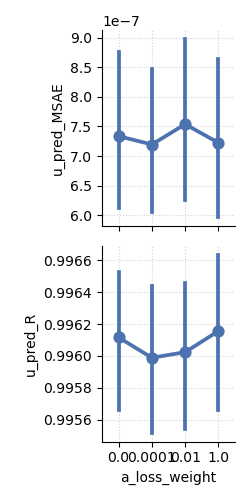

In [83]:
m = metrics.reset_index()

fig = ps.plot(
    m[m.spatial_region == 'all'],
    x=['a_loss_weight'],
    y=['u_pred_MSAE', 'u_pred_R'],
    height=2.5,
    width=2.5,
    legend=False,
    tight=True
)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[group_name] = df[group_cols].astype(str).agg(sep.join, axis=1)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[group_name] = df[group_cols].astype(str).agg(sep.join, axis=1)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[group_name] = df[group_cols].astype(str).agg(sep.join, axis=1)



<IPython.core.display.Javascript object>


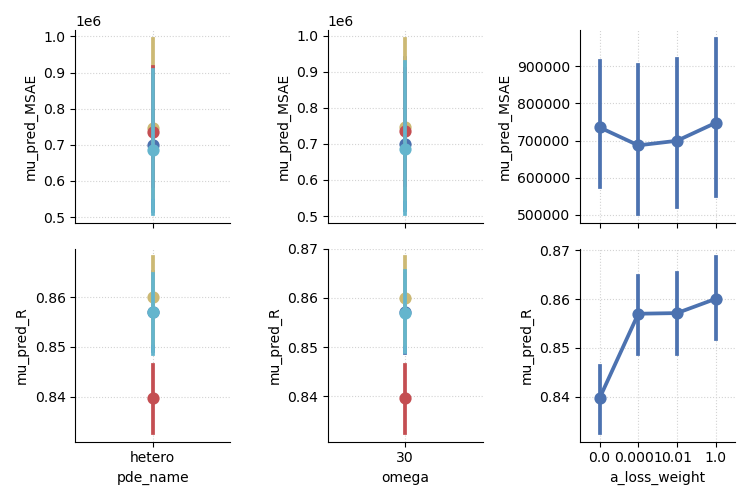

In [84]:
fig = ps.plot(
    m[m.spatial_region == 'all'],
    x=['pde_name', 'omega', 'a_loss_weight'],
    y=['mu_pred_MSAE', 'mu_pred_R'],
    height=2.5,
    width=2.5,
    legend=False,
    tight=True
)

In [50]:
m['method'] = 'PINN_' + m['pde_name']

direct_m = m[m.pde_name == 'hetero'].copy()
direct_m['method'] = 'direct_helmholtz'
for col in m.columns:
    if col.startswith('direct'):
        direct_m[col.replace('direct', 'mu')] = m[col]
        
#hh_fem_m = m[m.pde_name == 'helmholtz'].copy()
#hh_fem_m['method'] = 'FEM_helmholtz'
#for col in m.columns:
#    if col.startswith('fem'):
#        hh_fem_m[col.replace('fem', 'mu')] = m[col]

ht_fem_m = m[m.pde_name == 'hetero'].copy()
ht_fem_m['method'] = 'FEM_hetero'
for col in m.columns:
    if col.startswith('fem'):
        ht_fem_m[col.replace('fem', 'mu')] = m[col]
        
mm = pd.concat([direct_m, ht_fem_m, m])

method_order = ['direct_helmholtz', 'FEM_helmholtz', 'FEM_hetero', 'PINN_helmholtz', 'PINN_hetero']
mm['method_index'] = mm['method'].map(method_order.index)
mm = mm.sort_values('method_index')

In [51]:
import matplotlib as mpl
pct_format = mpl.ticker.PercentFormatter()

mm['mu_pred_MSAE_relative'] = mm['mu_pred_MSAE'] / mm['mu_true_MSAV'] * 100
mm['mu_pred_MAD_relative'] = mm['mu_pred_MAD'] / mm['mu_true_MAV'] * 100

In [52]:
%autoreload
import seaborn as sns
import matplotlib.pyplot as plt

colors = ps.results.get_color_palette(10, type='deep', min_val=0)
blue, orange, green, red, purple, brown, pink, gray, yellow, cyan = colors

colors = [blue, yellow, red, cyan, green]
#colors = [blue, yellow, cyan]
sns.set_palette(colors)
colors = sns.color_palette()
colors

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)]

In [53]:
mm.spatial_region.unique()

array(['all', '0.0', '1.0'], dtype=object)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[group_name] = df[group_cols].astype(str).agg(sep.join, axis=1)



<IPython.core.display.Javascript object>


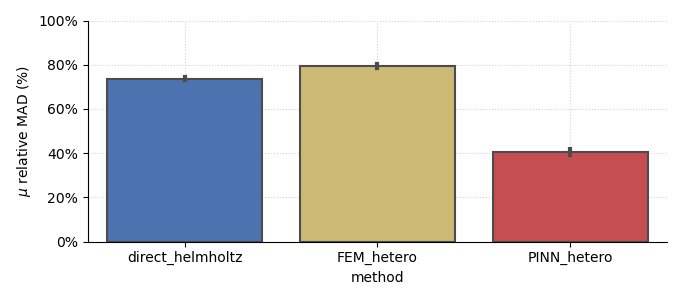

In [54]:
fig = ps.plot(
    mm[~mm.spatial_region.isin({'0.0', 'all'})],
    x='method',
    y='mu_pred_MAD_relative',
    height=3,
    width=7,
    legend=True,
    tight=True,
    plot_func=ps.results.barplot
)
fig.axes[0].set_ylabel('$\mu$ relative MAD (%)')
fig.axes[0].set_ylim(0, 100)
fig.axes[0].yaxis.set_major_formatter(pct_format)
fig.tight_layout()

for i, patch in enumerate(fig.axes[0].patches):
    plt.setp(patch, facecolor=colors[i])   

for ext in ['png', 'pdf']:
    fig.savefig(f'images/patient_method_bar_plot.{ext}', bbox_inches='tight', dpi=200)

<IPython.core.display.Javascript object>


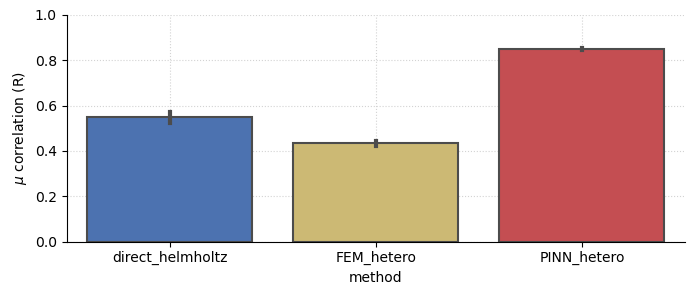

In [55]:
fig = ps.plot(
    mm[(mm.spatial_region == 'all') & (mm.spatial_frequency_bin == 'all')].copy(), # across all omegas
    x='method',
    hue='method',
    y='mu_pred_R',
    height=3,
    width=7,
    legend=False,
    tight=True,
    plot_func=ps.results.barplot
)
fig.axes[0].set_ylabel('$\mu$ correlation (R)')
fig.axes[0].set_ylim([0, 1])

for i, patch in enumerate(fig.axes[0].patches):
    plt.setp(patch, facecolor=colors[i])

for ext in ['png', 'pdf']:
    fig.savefig(f'images/patient_method_R_bar_plot.{ext}', bbox_inches='tight', dpi=200)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[group_name] = df[group_cols].astype(str).agg(sep.join, axis=1)



<IPython.core.display.Javascript object>


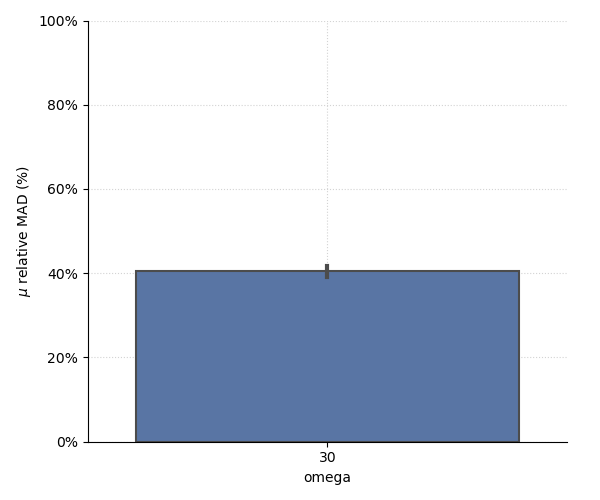

In [56]:
fig = ps.plot(
    mm[~mm.spatial_region.isin({'0', 'all'}) & mm.method.str.startswith('PINN')], 
    x='omega',
    y='mu_pred_MAD_relative',
    height=5,
    width=6,
    legend=True,
    tight=True,
    plot_func=ps.results.barplot
)
fig.axes[0].set_ylabel('$\mu$ relative MAD (%)')
fig.axes[0].yaxis.set_major_formatter(pct_format)
fig.axes[0].set_ylim(0, 100)
fig.tight_layout()

fig.axes[0].set_xlabel('omega')

for ext in ['png', 'pdf']:
    fig.savefig(f'images/patient_omega_bar_plot.{ext}', bbox_inches='tight', dpi=200)

In [68]:
mm['a_loss_weight'][mm.a_loss_weight == 0] = 1e-6

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mm['a_loss_weight'][mm.a_loss_weight == 0] = 1e-6



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[group_name] = df[group_cols].astype(str).agg(sep.join, axis=1)



<IPython.core.display.Javascript object>


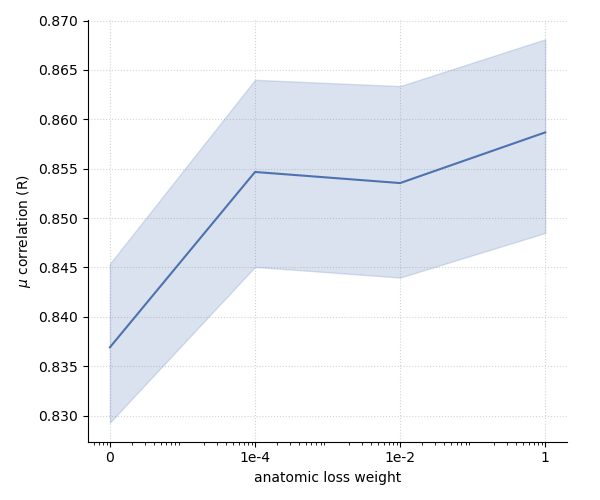

In [72]:
fig = ps.plot(
    mm[mm.spatial_region.isin({'all'}) & mm.method.str.startswith('PINN')], 
    x='a_loss_weight',
    y='mu_pred_R',
    height=5,
    width=6,
    legend=True,
    tight=True,
    plot_func=sns.lineplot
)
fig.axes[0].set_ylabel('$\mu$ correlation (R)')

fig.axes[0].set_xlabel('anatomic loss weight')
fig.axes[0].set_xscale('log')
fig.axes[0].set_xticks([1e-6, 1e-4, 1e-2, 1e0])
fig.axes[0].set_xticklabels(['0', '1e-4', '1e-2', '1'])
fig.tight_layout()


for ext in ['png', 'pdf']:
    fig.savefig(f'images/patient_anat_bar_plot.{ext}', bbox_inches='tight', dpi=200)

In [ ]:
%autoreload

blue, orange, green, red, purple, brown, pink, gray, yellow, cyan = sns.color_palette('tab10')

mre_pinn.visual.COLORS.update(
    red=red,
    yellow=yellow,
    green=green,
    cyan=cyan,
    blue=blue
)

In [ ]:
example.anat.sizes

In [ ]:
example = mre_pinn.data.MREExample.load_xarrays('../data/NAFLD/v3', '0006', anat=True)
example.arrays['anat'] = example.anat.sel(z=0.018237183332, method='nearest')
example.arrays['anat_mask'] = example.anat_mask.sel(z=0.018237183332, method='nearest')
example.view('anat', ax_height=2, space=0.2)
plt.gcf().tight_layout()
plt.savefig('images/patient_anat.png', dpi=200, bbox_inches='tight')
example.view('anat_mask', ax_height=2, space=0.2)
plt.gcf().tight_layout()
plt.savefig('images/patient_mask.png', dpi=200, bbox_inches='tight')
example.view('wave', ax_height=2, space=0.2)
plt.gcf().tight_layout()
plt.savefig('images/patient_wave.png', dpi=200, bbox_inches='tight')
example.view('mre', ax_height=2, space=0.2)
plt.gcf().tight_layout()
plt.savefig('images/patient_mre.png', dpi=200, bbox_inches='tight')

In [ ]:
%autoreload
import mre_pinn

image_names = ['wave image', 'ground truth', 'direct_helmholtz', 'FEM_helmholtz', 'FEM_hetero', 'PINN_helmholtz', 'PINN_hetero']

def plot_image_grid(example_ids):
    n_rows = len(example_ids)
    n_cols = len(image_names)
    ax_width = 1.2
    ax_height = ax_width

    fig, axes, cbar_ax = mre_pinn.visual.subplot_grid(n_rows, n_cols, ax_height, ax_width, space=0, pad=(0.35,0.15,0.15,0.25))
    for row_idx, example_id in enumerate(example_ids):
        example = mre_pinn.data.MREExample.load_xarrays('../data/NAFLD/v3', example_id)
        for col_idx, image_name in enumerate(image_names):
            ax = axes[row_idx,col_idx]
            #ax.text(0.1, 0.1, f'{row_idx}, {col_idx}')
            if col_idx == 0:
                ax.set_ylabel(example_id, fontsize='medium')
            if row_idx == 0:
                ax.set_title(image_name, fontsize='small')
            ax.set_yticks([])
            ax.set_xticks([])

            if image_name == 'wave image':
                array = example.wave[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = array.real * example.mre_mask.values[...,0]

            elif image_name == 'ground truth':
                array = example.mre[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array) * example.mre_mask.values[...,0]

            elif image_name == 'direct_helmholtz':
                nc_file = f'2022-11-26_patient_hetero2/train_patient_{example_id}_helmholtz/train_patient_{example_id}_helmholtz_direct.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='direct_pred')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'FEM_helmholtz':
                nc_file = f'2022-11-26_patient_hetero2/train_patient_{example_id}_helmholtz/train_patient_{example_id}_helmholtz_fem.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'FEM_hetero':
                nc_file = f'2022-11-23_patient_init/train_patient_{example_id}_hetero/train_patient_{example_id}_hetero_fem.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'PINN_helmholtz':
                nc_file = f'2022-11-26_patient_hetero2/train_patient_{example_id}_helmholtz/train_patient_{example_id}_helmholtz_elastogram.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'PINN_hetero':
                nc_file = f'2022-11-23_patient_init/train_patient_{example_id}_hetero/train_patient_{example_id}_hetero_elastogram.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            mre_pinn.visual.imshow(ax, array[:-24,8:-16], **color_kws)
    
    return fig

fig0 = plot_image_grid(['0006', '0020', '0024', '0029'])
fig1 = plot_image_grid(['0043', '0047', '0126', '0135'])

for ext in ['png', 'pdf']:
    fig0.savefig(f'images/patient_example_grid0.{ext}', bbox_inches='tight', dpi=200)
    fig1.savefig(f'images/patient_example_grid1.{ext}', bbox_inches='tight', dpi=200)

In [ ]:
example = mre_pinn.data.MREExample.load_xarrays('../data/NAFLD/v3', '0006')
example.view()

In [ ]:
import xarray as xr
u = example.wave
x = u.field.points(reshape=False)
x = (x - x.mean(axis=(0,1,2), keepdims=True)) / (x.max(axis=(0,1,2), keepdims=True) - x.min(axis=(0,1,2), keepdims=True))
x, y, z = x[...,0], x[...,1], x[...,2]
r = np.sqrt(x**2 + y**2)
sin = y / (r + 1e-3)
cos = x / (r + 1e-3)
x = np.stack([x, y, z, r, sin, cos], axis=-1)

print(x.shape)
x_dims = ['x', 'y', 'z', 'component']
x_coords = {
    'x': u.x,
    'y': u.y,
    'z': u.z,
    'component': ['x', 'y', 'z', 'r', 'sin', 'cos']
}
x = xr.DataArray(x, coords=x_coords, dims=x_dims)
x.name = 'position'
mre_pinn.visual.XArrayViewer(x, ax_height=3)

In [ ]:
example.wave.coords